In [212]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import functional as F
data = scipy.io.loadmat('../data/TsukubaHandSize24x24.mat')
data = data['data']

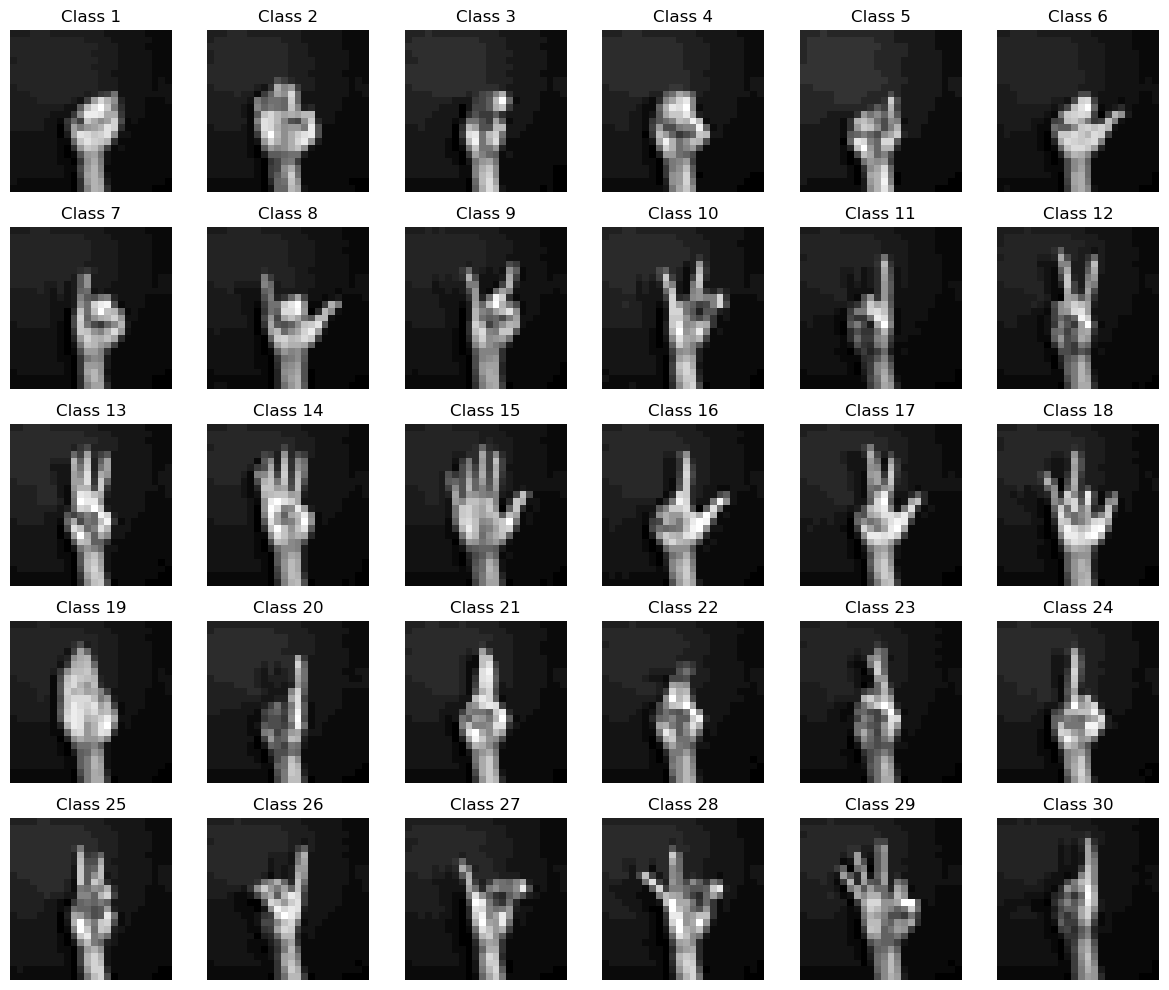

In [213]:
def display_one_image_per_class(data):
    num_classes = 30
    fig, axes = plt.subplots(5, 6, figsize=(12, 10))
    for i in range(num_classes):
        image = data[:, :, 0, 0, i, 0]  # Select one image from each class
        ax = axes[i // 6, i % 6]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Class {i + 1}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

display_one_image_per_class(data)

In [214]:
# plit data into train and test
def split_train_test(data, test_ratio=0.2):
    num_people = data.shape[5]
    num_test = int(num_people * test_ratio)
    test_data = data[:, :, :, :, :, :num_test]
    train_data = data[:, :, :, :, :, num_test:]
    return train_data, test_data

X_train, X_test = split_train_test(data)
print(X_test.shape)
print(X_train.shape)

(24, 24, 60, 7, 30, 20)
(24, 24, 60, 7, 30, 80)


In [215]:
# combine all camera images
X_test = X_test.reshape(24, 24, 60*7, 30, 20)
X_train = X_train.reshape(24, 24, 60*7, 30, 80)
print(X_train.shape)
print(X_test.shape)

(24, 24, 420, 30, 80)
(24, 24, 420, 30, 20)


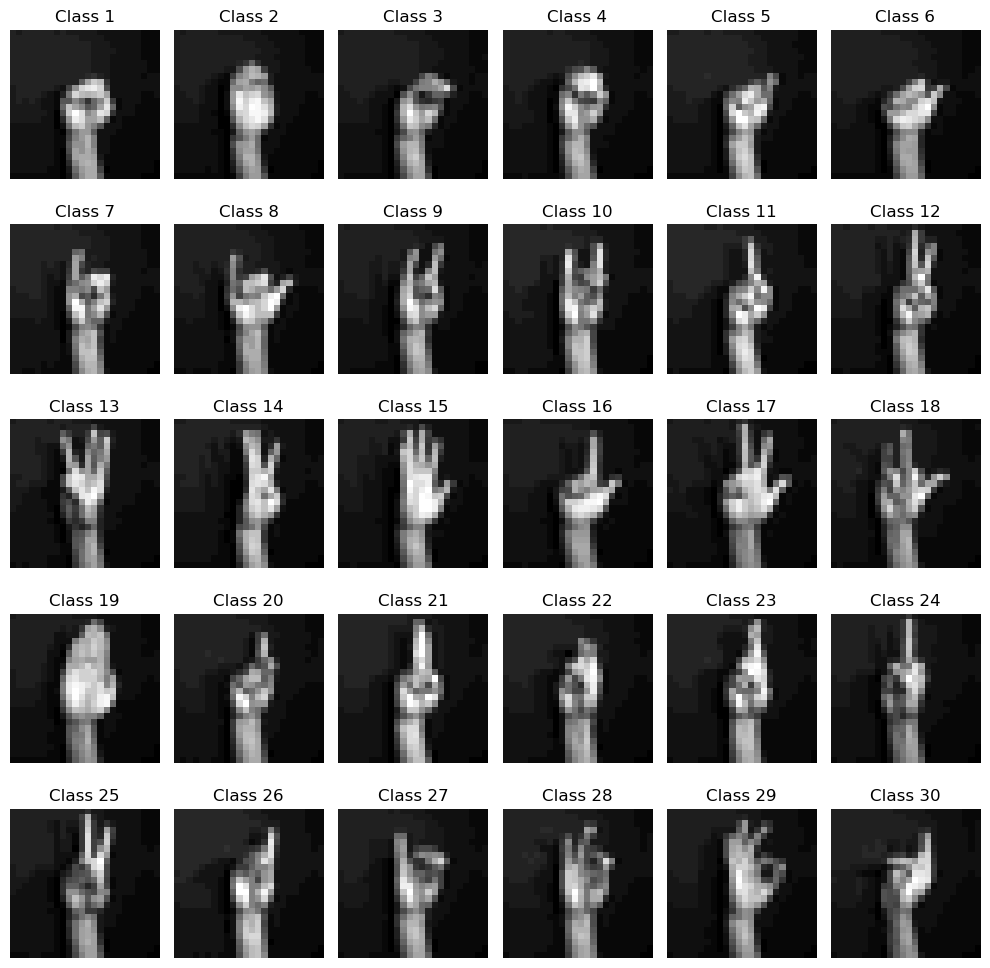

In [216]:
# Reorganize data to have shape (24, 24, 33600, 30)
x_train_organized = np.transpose(X_train, (0, 1, 4, 2, 3))
x_train_organized = np.reshape(x_train_organized, (24, 24, 420 * 80, 30))

# Define a function to plot images in a grid
def plot_images(images, grid_shape):
    fig, axes = plt.subplots(*grid_shape, figsize=(10, 10))
    
    for i, ax in enumerate(axes.flatten()):
        if i < images.shape[-1]:
            ax.imshow(images[:, :, i], cmap='gray')
            ax.set_title(f"Class {i+1}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Select one image per class
one_image_per_class = x_train_organized[:, :, 0, :]

# Plot one image per class
plot_images(one_image_per_class, grid_shape=(5, 6))

In [217]:
print(x_train_organized.shape)

(24, 24, 33600, 30)
